<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# ARIMA & SARIMA

_By Jeff Hale: adapted from  Matt Brems, Joseph Nelson, Justin Pounders_

___

### Learning Objectives

After this lesson you will be able to:
- Use ARIMA and its variants to forecast time series values


#### Prior knoweldge required
- Python, pandas, and machine learning basics
- Time series basics
- Understand autoregression 
---

#### Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

## Stationarity

The criteria for classifying a series as stationary are that the **mean** and **variance** are not a function of time. 

Stationarity in mean and variance: 
![](assets/stationary_mean_var.png)
From [this comprehensive article](https://towardsdatascience.com/stationarity-in-time-series-analysis-90c94f27322). 

**A stationary time series has no predictable pattern in the long-term.**



#### How can we test for stationarity? 

One way is by visualizing the data. Is the data below stationary?

![](assets/dow-jones.png)

Stationarity Quiz: 
https://otexts.com/fpp3/stationarity.html

### Testing for stationarity
If this visual check didn't show non-stationarity so clearly, we could use the **Augmented Dickey-Fuller test**: A statistical test of stationarity. 

$$
\begin{eqnarray}
&H_0:& \text{time series is NOT stationary} \\
&H_A:& \text{time series is stationary}
\end{eqnarray}
$$

`adfuller` is the method in the statsmodels library.

---
## Making time series more stationary

To manually make a time series more stationary by removing the trend, you can use **detrending** or **differencing**.

## Example: Detrending

To detrend:
1. Make a line of best fit (Linear Regression)
2. Subtract the values predicted by Linear Regression from the actual values

### Read in drone racing data 

In [36]:
# search results data on drone info over time

drones = pd.read_csv('data/gt_drone_racing.csv', header=1 )
drones.columns = ['week','drone_racing_interest']
drones.head()

,week,drone_racing_interest
0,2014-11-09,2
1,2014-11-16,2
2,2014-11-23,4
3,2014-11-30,6
4,2014-12-07,7


In [13]:
drones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   week                   108 non-null    datetime64[ns]
 1   drone_racing_interest  108 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.8 KB


#### Do the datetime and index conversion and sort 

In [37]:
# change week to a datetime variable
drones['week'] = pd.to_datetime(drones['week'])

In [38]:
# set index to week column
drones.set_index('week', inplace=True)

#### Make a best-fit line

In [39]:
# Make the data numeric
# trying to find a trend
X = pd.to_numeric(drones.index)
# needs to be 2d for sklearn, so reshape here
X = X.to_numpy().reshape(-1, 1)
y = drones['drone_racing_interest']

In [22]:
# this is now in some time delta format- likely seconds from a certain date in the past
X

array([[1415491200000000000],
       [1416096000000000000],
       [1416700800000000000],
       [1417305600000000000],
       [1417910400000000000],
       [1418515200000000000],
       [1419120000000000000],
       [1419724800000000000],
       [1420329600000000000],
       [1420934400000000000],
       [1421539200000000000],
       [1422144000000000000],
       [1422748800000000000],
       [1423353600000000000],
       [1423958400000000000],
       [1424563200000000000],
       [1425168000000000000],
       [1425772800000000000],
       [1426377600000000000],
       [1426982400000000000],
       [1427587200000000000],
       [1428192000000000000],
       [1428796800000000000],
       [1429401600000000000],
       [1430006400000000000],
       [1430611200000000000],
       [1431216000000000000],
       [1431820800000000000],
       [1432425600000000000],
       [1433030400000000000],
       [1433635200000000000],
       [1434240000000000000],
       [1434844800000000000],
       [14

In [23]:
y

week
2014-11-09     2
2014-11-16     2
2014-11-23     4
2014-11-30     6
2014-12-07     7
              ..
2016-10-30    33
2016-11-06    43
2016-11-13    52
2016-11-20    60
2016-11-27    46
Name: drone_racing_interest, Length: 108, dtype: int64

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [26]:
preds = lr.predict(X)

#### Plot it

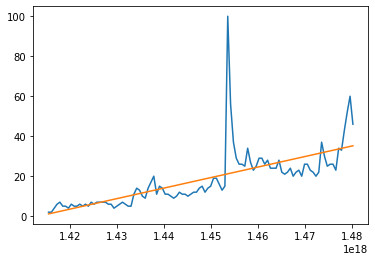

In [27]:
# this is the best fit line
plt.plot(X, y);
plt.plot(X, preds);

In [31]:
# subtract the values from this line from the actual data
# and this will sort of normalize things
# this is just part of data prep/preprocessing, so no need to
# train test split this
detrended = y - preds

In [29]:
detrended

week
2014-11-09     0.868502
2014-11-16     0.550087
2014-11-23     2.231673
2014-11-30     3.913258
2014-12-07     4.594844
                ...    
2016-10-30    -0.928177
2016-11-06     8.753408
2016-11-13    17.434994
2016-11-20    25.116579
2016-11-27    10.798165
Name: drone_racing_interest, Length: 108, dtype: float64

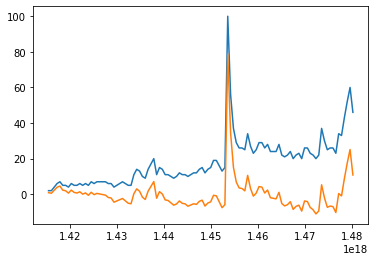

In [30]:
# this is a little more stationary, but not perfect
# another option is differencing
plt.plot(X, y);
plt.plot(X, detrended);

Congrats! You just detrended! 🎉

---
### Differencing

Another method to make time series data more stationarity is **differencing**. 

The differenced series is the change between consecutive observations. So subtract the value at time `t-1` from the value at `t`. 

Earlier you saw how to use the pandas `.diff()` method to find the difference between one time period and the time period before. 

#### Use `diff()` to manually difference the data.

In [32]:
# instead of showing you the value, it's showing you the diff from the prior row
# if data weren't sorted already, we might have needed to sort values. 
drones.diff().head()

,drone_racing_interest
week,
2014-11-09,NaN
2014-11-16,0.0
2014-11-23,2.0
2014-11-30,2.0
2014-12-07,1.0


In [40]:
# add another column to df with the difference
drones['difference'] = drones.diff()


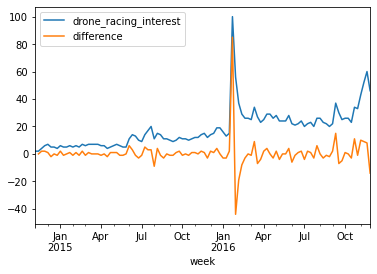

In [41]:
drones.plot();

#### How does the result of detrending compare to the result of differencing?

2nd order differencing is modeling the change in changes.🤔

"In practice, it is almost never necessary to go beyond second-order differences." - [Hyndman](https://otexts.com/fpp3/stationarity.html)

---
# ARIMA
Now let's do AutoRegression but take into account the trend with ARIMA: Auto-Regressive Integrated Moving Average.🚀

The *Moving Average* here really means fitting the errors - kind of like gradient boosting models fit the errors of earlier models subsequent models. 

An $ARIMA(p, d, q)$ model is specified by
- how many lags $p$ we regress $Y_t^{(d)}$ on.
- how many differences $d$ we need to calculate in order to best achieve stationarity.
- how many errors $q$ we regress $Y_t^{(d)}$ on. 


See the slides for more info: [arima-modeling.pdf](arima-modeling.pdf).

Three hyperparameters when fitting an ARIMA model:
1. Determine a value of $d$ using the Augmented Dickey-Fuller test or KISS test.
2. Determine values of $p$ and $q$ through grid searching.

We'll use the sales data we were using with exponential smoothing models. 

We know there is seasonality here. Let's skip to the next extension: SARIMA.


In [6]:
train = pd.read_csv('data/train.csv')


In [7]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [9]:
# just look at Store 1
store_1 =train.loc[train['Store']==1]

In [10]:
# make datetime
store_1['Date'] = pd.to_datetime(store_1['Date'])

/var/folders/kz/klxfgxt54zg3ld3hw3501lf80000gp/T/ipykernel_9922/493977952.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store_1['Date'] = pd.to_datetime(store_1['Date'])


In [11]:
store_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10244 entries, 0 to 10243
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         10244 non-null  int64         
 1   Dept          10244 non-null  int64         
 2   Date          10244 non-null  datetime64[ns]
 3   Weekly_Sales  10244 non-null  float64       
 4   IsHoliday     10244 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 410.2 KB


In [12]:
# make date index on data frame
store_1.set_index('Date', inplace=True)

In [13]:
store_1.head()

,Store,Dept,Weekly_Sales,IsHoliday
Date,,,,
2010-02-05,1,1,24924.50,False
2010-02-12,1,1,46039.49,True
2010-02-19,1,1,41595.55,False
2010-02-26,1,1,19403.54,False
2010-03-05,1,1,21827.90,False


In [14]:
X= store_1['Weekly_Sales']
X.head()
# limit to 2012 only
X = X.loc['2012']

<AxesSubplot:xlabel='Date'>

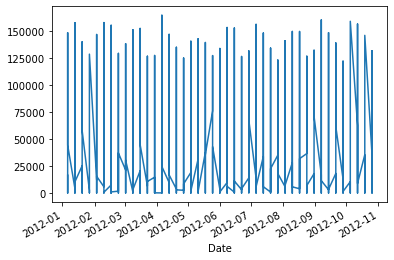

In [15]:
X.plot()

In [17]:
# sklearn doesn't have a ton of time seas
from statsmodels.tsa.arima_model import ARIMA

In [18]:
# order param is p,d,q. Default is all zeroes
# p - r regressive - so build model using one prior time step
# q - moving average, use one prioro moving average term to build model
# you can eventually gridsearch these params
model = ARIMA(X, order = (1, 0 ,1))

/Users/hannah.westberg/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/hannah.westberg/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been 

In [19]:
fitmodel = model.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.01262D+01    |proj g|=  1.53300D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      4      7      1     0     0   0.000D+00   1.013D+01
  F =   10.126190995098616     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


In [20]:
# this shows coefficients, intercept terms etc. 
# you want to test a few different hyperparameters until you find 
# the best AIC
# there is a library that will do the gridsearch ARIMA and SARIMA 
# for us, which is much easier to use. 
fitmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           Weekly_Sales   No. Observations:                 3075
Model:                     ARMA(1, 1)   Log Likelihood              -31138.037
Method:                       css-mle   S.D. of innovations           6043.524
Date:                Mon, 11 Apr 2022   AIC                          62284.075
Time:                        18:54:43   BIC                          62308.199
Sample:                             0   HQIC                         62292.741
                                                                              
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2.218e+04   5825.046      3.808      0.000    1.08e+04    3.36e+04
ar.L1.Weekly_Sales     0.9854      0.003    315.546      0.000       0.979       0.992
ma.L1.Weekly_Sales    -0.2047      0.023     -8.897      0.000      -0.250      -0.160
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0148           +0.0000j            1.0148            0.0000
MA.1            4.8860           +0.0000j            4.8860            0.0000
-----------------------------------------------------------------------------
"""

---
# SARIMA

SARIMA adds seasonality to ARIMA (and you get to choose 4 more parameters). 😀

There are a total of 7 parameters to choose `(p, d, q)` `(P, D, Q)` and `m`. 

- `p` is for the autoregressive component (lags)
- `d` stands for differencing
- `q` is essentially what controls the the moving average window size.

The next three capitalized arguments (`P`, `D`, and `Q`) are for the seasonal components of the equation.

- `m` is for the number of observations per seasonal cylce. 

### For weekly sales data with annual holiday seasonality, `m` would be 52 (for 52 weeks). 

If you had montly data with annual holiday seasonality, what would `m` be?

More in-depth explanation of all the parameters [here](https://alkaline-ml.com/pmdarima/tips_and_tricks.html#understand-p-d-and-q).


## SARIMA with auto-arima 

There are a bunch of ways to find parameter values for SARIMA. You can use autocorrelation plots and partial correlation plots and individual statistical tests to try to figure out parameters. 

Let's use a package that makes GridSearching easier. [pmdarima](https://pypi.org/project/pmdarima/) wraps statsmodels SARIMA under the hood and is designed to have a more sklearn-like API.

#### Using pandas, read in the sales data we saved previously 

In [75]:
pip install pmdarima 

     |████████████████████████████████| 604 kB 2.9 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [4]:
# pdarima sits on top of a statsmodel and does gridsearch to help fit the
# best ARIMA
import pmdarima as pmd
from pmdarima.utils import tsdisplay

/Users/hannah.westberg/opt/anaconda3/lib/python3.9/site-packages/pmdarima/utils/visualization.py:220: FutureWarning: the 'unbiased'' keyword is deprecated, use 'adjusted' instead
  res = tsaplots.plot_acf(


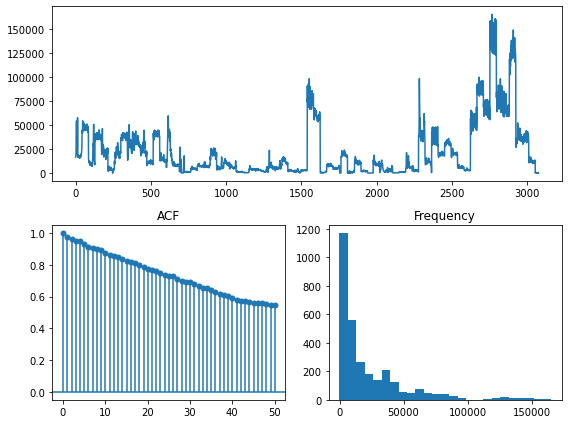

In [21]:
tsdisplay(X)

In [24]:
# this will do gridsearch on a bunch of hyperparameter combos
# should print out an AIC score for each combo of hyperparams
# we're assuming a seasonaliy of 52
# be default, it trains 4 combos, but we can specify more combos or
# tell it the values to try for p, q, and d
model = pmd.auto_arima(X, m = 52, trace=True)

# how to interpret AIC? lower AIC is better
# under/overfitting? sort of have to think about this-but in a diff
# way
# our training data would be the first part of the time series
# and our test data would be the more recent part of the time series




Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[52] intercept   : AIC=61880.220, Time=19.49 sec
 ARIMA(0,1,0)(0,0,0)[52] intercept   : AIC=62367.134, Time=0.06 sec
 ARIMA(1,1,0)(1,0,0)[52] intercept   : AIC=62260.579, Time=3.54 sec
 ARIMA(0,1,1)(0,0,1)[52] intercept   : AIC=62235.212, Time=3.80 sec
 ARIMA(0,1,0)(0,0,0)[52]             : AIC=62365.136, Time=0.04 sec
 ARIMA(2,1,2)(0,0,1)[52] intercept   : AIC=61878.003, Time=17.10 sec
 ARIMA(2,1,2)(0,0,0)[52] intercept   : AIC=61876.236, Time=1.27 sec
 ARIMA(2,1,2)(1,0,0)[52] intercept   : AIC=61878.010, Time=19.66 sec
 ARIMA(1,1,2)(0,0,0)[52] intercept   : AIC=62199.761, Time=0.45 sec
 ARIMA(2,1,1)(0,0,0)[52] intercept   : AIC=62173.165, Time=0.98 sec
 ARIMA(3,1,2)(0,0,0)[52] intercept   : AIC=61747.246, Time=2.23 sec
 ARIMA(3,1,2)(1,0,0)[52] intercept   : AIC=61748.993, Time=18.53 sec
 ARIMA(3,1,2)(0,0,1)[52] intercept   : AIC=61748.986, Time=20.96 sec
 ARIMA(3,1,2)(1,0,1)[52] intercept   : AIC=61751.219, Time=23.75 sec

KeyboardInterrupt: 

In [25]:
from sklearn.model_selection import train_test_split

In [28]:
X= X.iloc[:-100]

In [29]:
# shuffle = false keeps the order, so it just separates based on dates
# we don't have a second sequence so we don't need y
# instead, we're predicting the next row of data based on days. 
X_train, X_test = train_test_split(X, shuffle=False)



In [30]:
X_test.head()

Date
2012-10-05    6472.62
2012-10-12    6242.93
2012-10-19    6429.74
2012-10-26    7319.25
2012-01-06    2951.08
Name: Weekly_Sales, dtype: float64

In [31]:
model = pmd.auto_arima(X_train, m = 52)

KeyboardInterrupt: 

In [ ]:
model.stats()

In [ ]:
# we tell it how many days to predict on
preds= model.predict(len(X_test))

Make some plots.

In [ ]:
# plt.plot(X_train.index, X_train)
plt.plot(X_test.index, X_test)
plt.plot(X_test.index,preds, label = 'predict')
plt.legend()

Let's instantiate a model. 

`m=52` for the number of observations per seasonal cycle

By default, pmdarima tries 4 common possible models. Then models similar to the best model found are considered. Model performance is determined by the lowest AIC (or BIC).

Or you could specify parameters by hand.

In [ ]:
# model = pmd.auto_arima(
#     train['Weekly_Sales'], 
#     start_p=1, 
#     start_q=1,
#     max_p=2,                 # Hyndman says p almost never > 2
#     max_q=2,
#     d=0,                     # from ndiffs testing
#     start_P=1, 
#     start_Q=1,
#     max_P=2,                
#     max_Q=2,
#     seasonal=True, 
#     m=52,
#     error_action='ignore',   # don't want to know if an order does not work
#     suppress_warnings=True,  # don't want convergence warnings
# )

# # autoarima uses KPSS test instead of ADF for stationarity, by defualt

The Model displays the final parameters. Now we can use the model object to predict the "future" values.

#### Read in the sales predictions we made earlier and add the sarima predictions

#### Plot

#### How did that model perform?

Could try other values for SARIMA. The search wasn't exhaustive.

---
# SARIMAX

SARIMAX extends SARIMA. The X in [SARIMAX](https://www.statsmodels.org/dev/examples/notebooks/generated/statespace_sarimax_stata.html) stands for eXogenous variables. Exogenous means "external" (so not *y* nor dependent upon *y*) - think independent features.

SARIMAX allows you to add more predictors, so it's not just the previous values that predict the future values. For example, you can encode another column to be a holiday/no holiday. 🎉

pmdarima wraps SARIMAX. 

#### For example, let's put holidays in as another column
Add a column so that holiday is a 1 and every other day is a 0.

In [32]:
store_1.head(1)

,Store,Dept,Weekly_Sales,IsHoliday
Date,,,,
2010-02-05,1,1,24924.5,False


In [44]:
store_1['IsHoliday'] = store_1['IsHoliday'].astype('int')

/var/folders/kz/klxfgxt54zg3ld3hw3501lf80000gp/T/ipykernel_9922/794860383.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store_1['IsHoliday'] = store_1['IsHoliday'].astype('int')


In [48]:
X = store_1[['IsHoliday', 'Weekly_Sales']].iloc[-100]

In [49]:
model2 = pmd.auto_arima(y= X['Weekly_Sales'], X = X[['IsHoliday']])

TypeError: Singleton array array(11210.22) cannot be considered a valid collection.

Doh! The data is aggregated by week. This is the kind of stuff that comes up with time series problems.

Let's just add a 1 for the week of Christmas. This is just an illustration. You could add in the marketing spend as another exogenous variable if you had it.

#### Make a model and this time include X

#### Make predictions

The test set only goes through October, so we'll just make the holiday a date in October so you can see what happens to the predictions.

#### Plot

#### Score

The AIC penalizes more features (in this sense, it's like adjusted R2).  

If you have a model that isn't predicting well, you could try to manually make the time series stationary by doing things like Power Transforming it prior to fitting. 

---
## Summary

You've seen how to fit SARIMA and SARIMAX models with `pmd.auto_arima`.

ARIMA models and ETS models (The Exponential Smoothing family including Holt Witners) share some overlap. See [Hyndman](https://otexts.com/fpp3/arima-ets.html) for discussion.

These two model families are quite good for univariate forecasting. SARIMAX lets you add other features to your model.

### Check for understanding

- What do pdq and PDQ stand for?
- How do you add more features to a SARIMA model?